## Análisis diabetes

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import soporte as se

In [2]:
# Mostrar todas las columnas del df
pd.set_option('display.max_columns', None)

In [3]:
# Importar DataFrame 'diabetes' y mostrar las 5 primeras filas del df
df = pd.read_csv('./Datos/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Mostrar las 5 últimas filas del df
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Dimensiones del df
df.shape

(768, 9)

In [6]:
print(f'El dataframe tiene {df.shape[1]} columnas y {df.shape[0]} filas')

El dataframe tiene 9 columnas y 768 filas


In [7]:
# Mostrar nombres de columnas, tipos de datos y recuento de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Identificación de valores duplicados
df_duplicados = df.duplicated().sum()

In [10]:
# Recuento de filas duplicadas
print(f'Número de filas duplicadas: {df_duplicados}')

Número de filas duplicadas: 0


In [11]:
# Cálculo de las edades mínima y máxima
min_edad = df['Age'].min()
max_edad = df['Age'].max()
print(f'La edad mínima es de: {min_edad}')
print(f'La edad máxima es de: {max_edad}')

La edad mínima es de: 21
La edad máxima es de: 81


In [12]:
# Mostramos el resumen de la estadística descriptiva para las columnas numéricas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>A tener en cuenta:</h5>

- Observamos que el mínimo de las variables Glucose, BloodPressure, SkinThicknes, Insulin y BMI es 0, lo cual nos indica que dichos valores no son lógicos.

</div>

In [13]:
# Para gestionar los datos, primeramente creamos una copia del df
df_copy = df.copy()

In [14]:
# Reemplazamos los valores en 0 por NaN de las columnas que sospechamos que no son valores lógicos
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [15]:
# Mostramos de nuevo la info, ahora del df_copy para comprobar si ya poseemos valores nulos
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


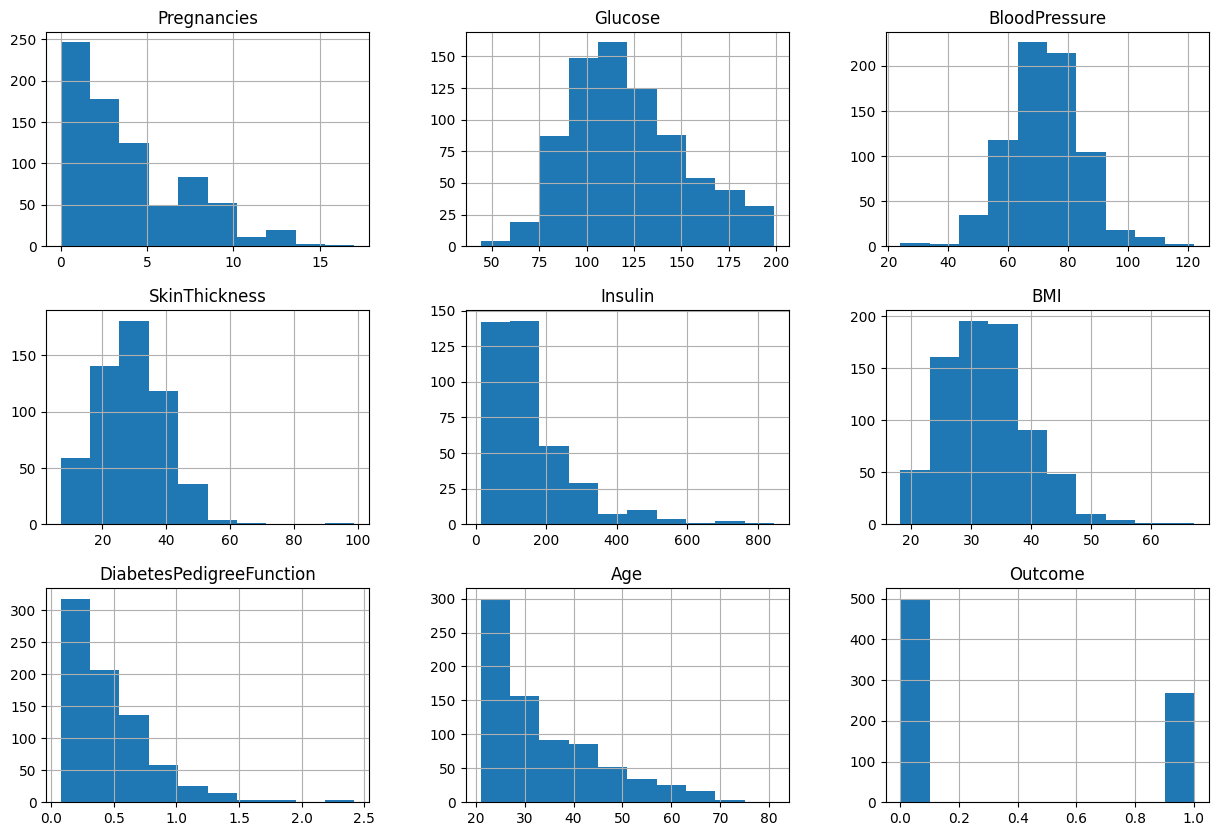

In [16]:
# Comprobamos mediante histogramas dónde se encuentran los datos
df_copy.hist(figsize=(15,10));

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">

Podemos observar que casi todos los datos se encuentran hacia la izquierda, salvo BloodPressure y ligeramente Glucose. En los casos en los que la información se encuentra centrada, podemos reemplazar los valores nulos por la media. En el resto, utilizaremos la mediana.

Para tener una mejor visión, recurrimos a los gráficos de cajas.

</div>

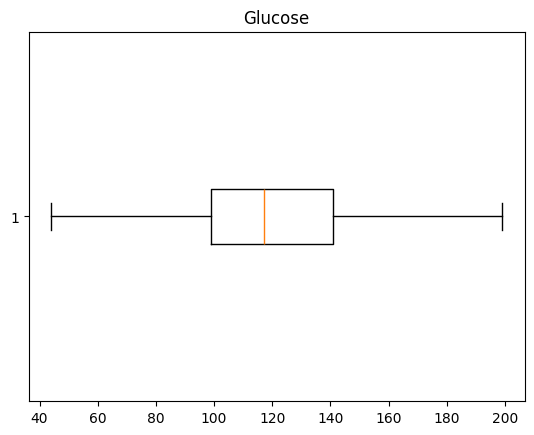

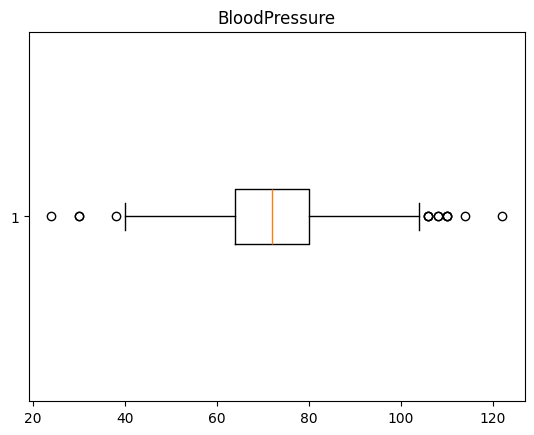

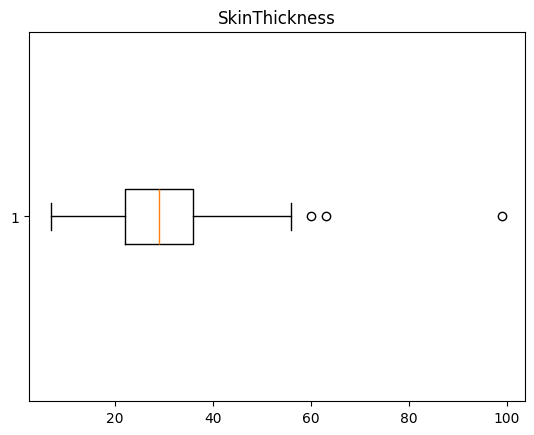

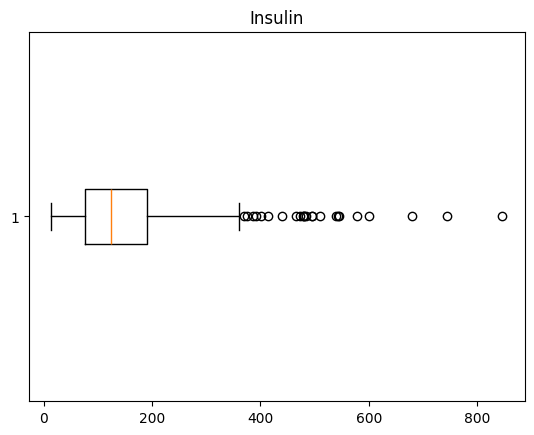

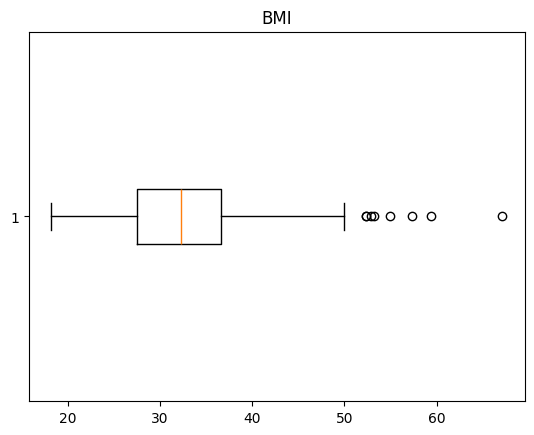

In [17]:
# Revisión de valores atípicos con boxplot
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Para visualizar aquellos que hemos establecido en la variable 'cols', utilizamos un bucle for
for col in cols:
    plt.boxplot(df_copy[col].dropna(),
                vert=False)
    plt.title(col)
    plt.show()

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">

Con los gráficos de cajas podemos ver de nuevo que BloodPressure y Glucose poseen una distribunión normal, dónde la mayoría de los valores se agrupan alrededor de la media, pero éste último no presenta valores atípicos, mientras que BloodPressure sí. 
Por lo tanto, para Glucosa, rellenaremos los valores nulos con la media, mientras que para el resto con la mediana.

</div>

In [18]:
# Completamos los valores nulos con los estadísticos correspondientes
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

In [19]:
# Comprobamos que ya no hay valores nulos con .info()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
# Comprobamos que los valores estadísticos son más lógicos
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


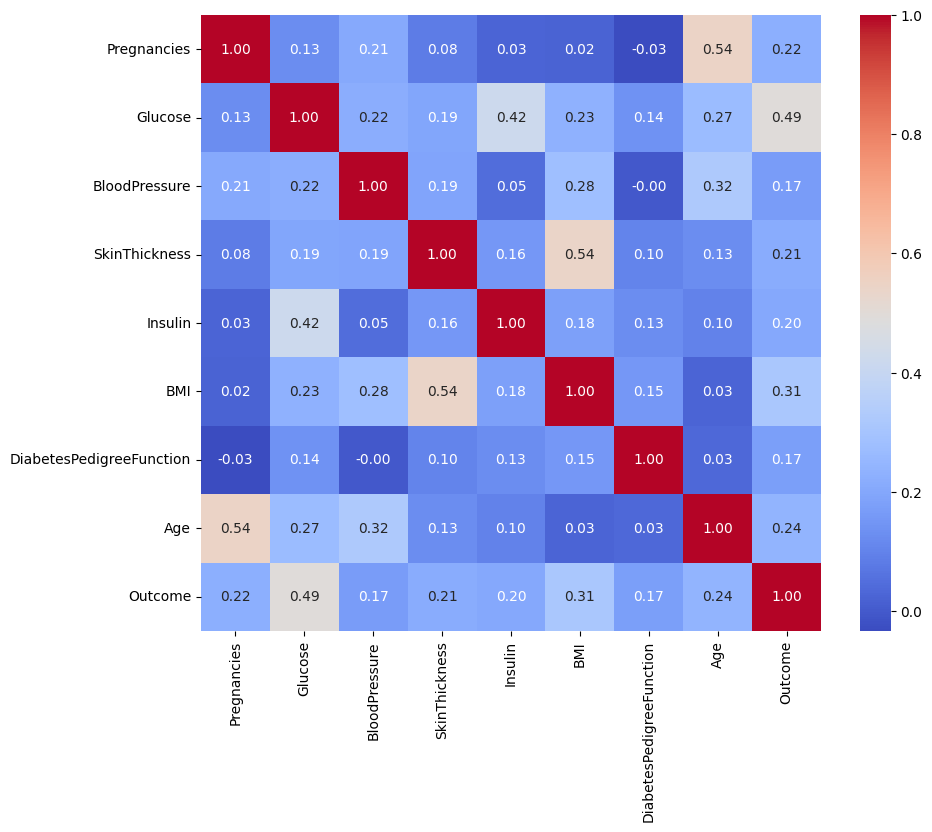

In [21]:
# Analizamos las correlaciones mediante un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


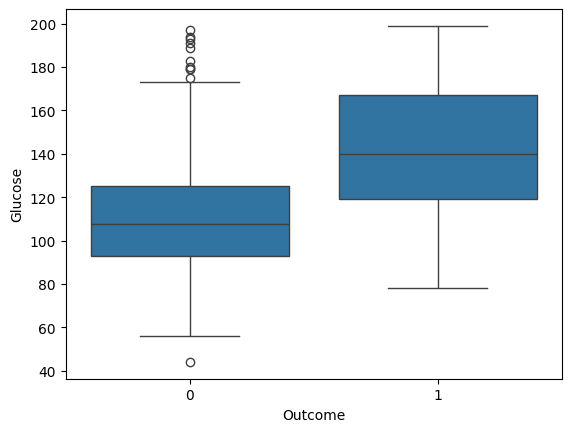

In [22]:
# Observamos la relación entre la Glucosa y la probabilidad de sufrir diabetes
sns.boxplot(x='Outcome', y='Glucose', data=df_copy)
plt.show()

In [23]:
# Añadimos una nueva columna llamada 'age_category' en función de la edad
df_copy['Age_category'] = df_copy['Age'].apply(se.cat_edad)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Mediana edad
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Adulto jóven
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Adulto jóven
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Jóven adulto
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Adulto jóven


In [24]:
# Recuento de los valores por grupo de edad
df_copy_category = df_copy['Age_category'].value_counts().reset_index()

In [25]:
# Ponemos nombre a las columnas y mostramos el df
df_copy_category.columns = ['Age_category', 'Count']
print(df_copy_category)

   Age_category  Count
0  Jóven adulto    367
1  Adulto jóven    194
2  Mediana edad    126
3  Adulto mayor     81


In [26]:
# Añadir otra columna llamada 'Diabético' que indique 'Si' si 'Outcome' es igual a 1 y 'No' si es 0.
df_copy['Diabetico'] = df_copy['Outcome'].apply(lambda x: 'Si' if x == 1 else 'No')
df_copy.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category,Diabetico
168,4,110.0,66.0,29.0,125.0,31.9,0.471,29,0,Adulto jóven,No
333,12,106.0,80.0,29.0,125.0,23.6,0.137,44,0,Mediana edad,No
567,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0,Mediana edad,No
736,0,126.0,86.0,27.0,120.0,27.4,0.515,21,0,Jóven adulto,No
49,7,105.0,72.0,29.0,125.0,32.3,0.305,24,0,Jóven adulto,No


In [27]:
# Estadística descriptiva de personas diabéticas
df_copy[df['Outcome']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,142.165573,29.541750,78.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,75.123134,11.951672,30.000,68.0000,74.000,82.000,114.00
SkinThickness,268.0,31.686567,8.662994,7.000,29.0000,29.000,36.000,99.00
Insulin,268.0,164.701493,100.932249,14.000,125.0000,125.000,167.250,846.00
BMI,268.0,35.383582,6.595603,22.900,30.9000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [28]:
# Estadística descriptiva de personas SIN diabetes
df_copy[df['Outcome']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,110.710121,24.717060,44.000,93.00000,107.500,125.00000,197.000
BloodPressure,500.0,70.920000,11.929385,24.000,63.50000,72.000,78.00000,122.000
SkinThickness,500.0,27.726000,8.552966,7.000,22.00000,29.000,31.00000,60.000
Insulin,500.0,127.792000,74.447469,15.000,95.00000,125.000,125.00000,744.000
BMI,500.0,30.885600,6.504128,18.200,25.75000,30.400,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Interpretación de la estadística descriptiva:</h5>

- Las personas diabéticas poseen, de media, unos niveles superiores de glucosa, presión arterial, espesor de piel, insulina y BMI.

</div>

In [29]:
# Agregamos una columna llamada 'Id'
df_copy['Id'] = range(1, len(df_copy) + 1)

In [30]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category,Diabetico,Id
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Mediana edad,Si,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Adulto jóven,No,2
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Adulto jóven,Si,3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Jóven adulto,No,4
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Adulto jóven,Si,5


In [31]:
# Recuento de los valores de aquellas personas con diabetes y sin diabetes
diabetes_counts = df_copy['Diabetico'].value_counts()
diabetes_counts

Diabetico
No    500
Si    268
Name: count, dtype: int64

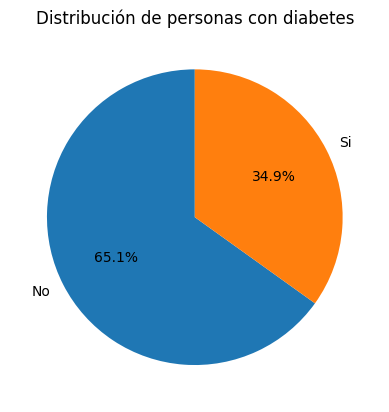

In [32]:
# Graficamos en forma de tarta el porcentaje de diabéticos y no diabéticos
plt.pie(diabetes_counts, labels= diabetes_counts.index,
        data = df_copy, 
        autopct=  '%1.1f%%',  
        textprops={'fontsize': 10}, 
        startangle=90)

plt.title("Distribución de personas con diabetes");

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">

Observamos que más de un tercio de la muestra presenta diabetes, concretamente el 35%, que se traduce en un total de 268 personas.

</div>

In [33]:
# Agrupo por 'Age_category' y 'Diabetico' para contar las ocurrencias
age_diabetes_counts = df_copy.groupby(['Age_category', 'Diabetico']).size().unstack()
age_diabetes_counts

Diabetico,No,Si
Age_category,,
Adulto jóven,105,89
Adulto mayor,43,38
Jóven adulto,296,71
Mediana edad,56,70


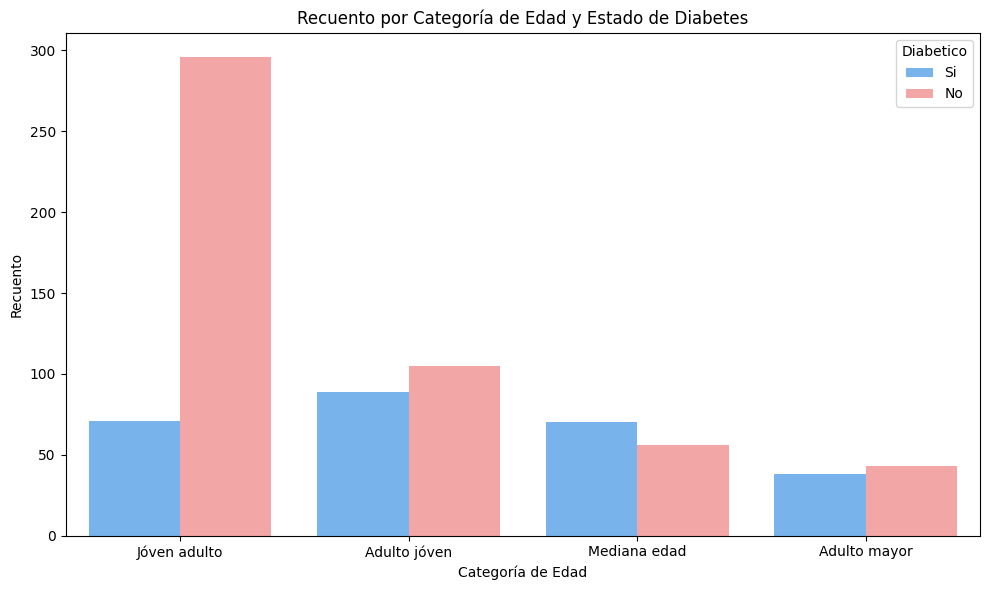

In [34]:
# Creamos el orden de las categorías
orden = ["Jóven adulto", "Adulto jóven", "Mediana edad", "Adulto mayor"]

# Convertimos la columna 'Age_category' en tipo categórico con el orden definido
df_copy['Age_category'] = pd.Categorical(df_copy['Age_category'], categories=orden, ordered=True)

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_copy, x='Age_category', y='Id', hue='Diabetico', estimator=len, palette=['#66b3ff', '#ff9999'])

# Añadimos etiquetas y título
plt.xlabel('Categoría de Edad')
plt.ylabel('Recuento')
plt.title('Recuento por Categoría de Edad y Estado de Diabetes')

# Mostramos el gráfico
plt.tight_layout()
plt.show();

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000000; color: black; border-radius: 10px;">
<h5>Conclusiones:</h5>

- La categoría de **Jóven adulto (entre 18 y 28 años)** posee el mayor número de individuos sin diabetes.

- A medida que aumenta la edad, se observa un aumento relativo en la proporción de personas con diabetes.

- La categoría **Mediana edad (entre 40 y 50 años)** tiene una mayor proporción de personas diabéticas en comparación con el resto de grupos, siendo el grupo más propenso a desarrollar diabetes. 

- El grupo **Adulto mayor (superior a 50 años)** es el que menor cantidad de personas posee, contando con una menor representación en la muestra. En su caso, la proporción entre diabéticos y no diabéticos es similar. 

</div>